[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) gender b) weight c) number of cars in a parking lot d) time

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
carbon_west.head(5)


,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


Part a. Construct a histogram of CO2 emissions.

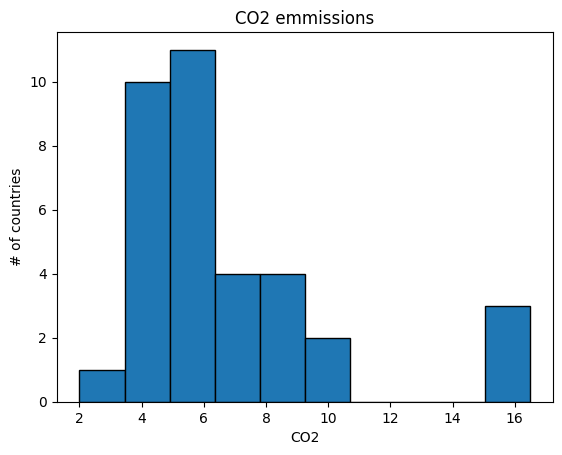

In [ ]:
plt.hist(carbon_west['CO2'], edgecolor='black')
plt.title(f'CO2 emmissions')
plt.xlabel("CO2")
plt.ylabel('# of countries')
plt.show()

In [ ]:
import numpy as np

Part b. Find the mean, median, and standard deviation.

In [ ]:
mean_value = np.mean(carbon_west['CO2'])
median_value = np.median(carbon_west['CO2'])
std_dev = np.std(carbon_west['CO2'])

print(mean_value)
print(median_value)
print(std_dev)

6.717142857142858
5.9
3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [ ]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders.head(5)

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


Part a. Find the mean and standard deviation for murders without D.C.

In [ ]:
murders_wo_DC = murders.drop(50)

mean_wo_DC = np.mean(murders_wo_DC['murder'])
std_dev_wo_DC = np.std(murders_wo_DC['murder'])

print(mean_wo_DC)
print(std_dev_wo_DC)

4.874
2.560297638947472


Part b. Find the five-number  summary without D.C.

In [ ]:
minimum = np.min(murders_wo_DC['murder'])
q1 = np.percentile(murders_wo_DC['murder'], 25)
median = np.median(murders_wo_DC['murder'])
q3 = np.percentile(murders_wo_DC['murder'], 75)
maximum = np.max(murders_wo_DC['murder'])

print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [ ]:
mean_with_DC = np.mean(murders['murder'])
median_with_DC = np.median(murders['murder'])

print(mean_with_DC)
print(median_with_DC)

minimum = np.min(murders['murder'])
q1 = np.percentile(murders['murder'], 25)
median = np.median(murders['murder'])
q3 = np.percentile(murders['murder'], 75)
maximum = np.max(murders['murder'])

print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

5.252941176470588
5.0
Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2


The mean was affected my by including the outlier as it went from 4.874 without DC to 5.25294 with DC. The median went from 4.85 without DC to 5.0 with DC. This was expected as the mean is often more influence by outliers.

The range was more affected as it went from 11.4 without DC to 23.2 with DC. The interquartile range went from 3.55 without DC to 3.8 with DC. This is also expected as the range will be more dramatically affected by outliers as it is measuring max to min value.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [ ]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head(5)

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home.

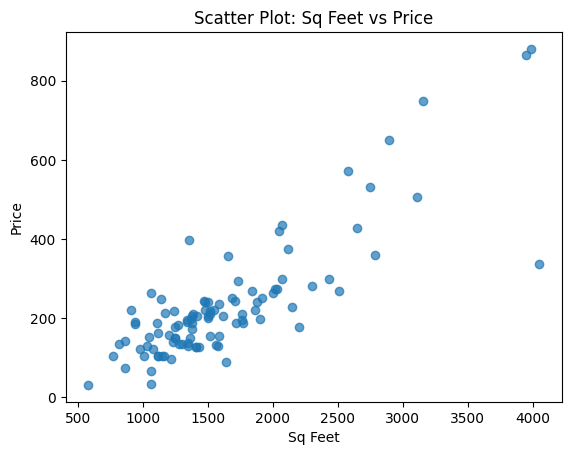

In [ ]:
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Sq Feet vs Price')
plt.xlabel('Sq Feet')
plt.ylabel('Price')
plt.show()

Part b. Find the correlation between the two variables.

In [ ]:
correlation = houses['size'].corr(houses['price'])

print(correlation)

0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = houses[['size']]
y = houses['price']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

LinearRegression()

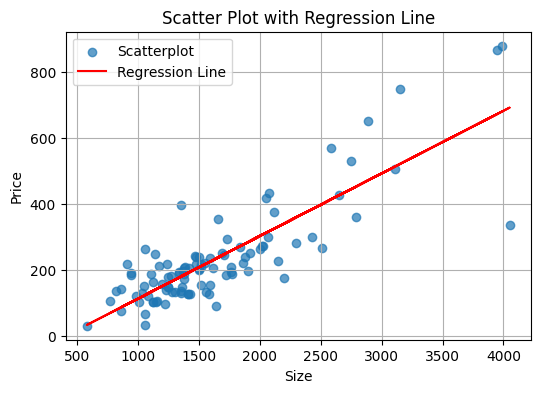

In [ ]:
# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

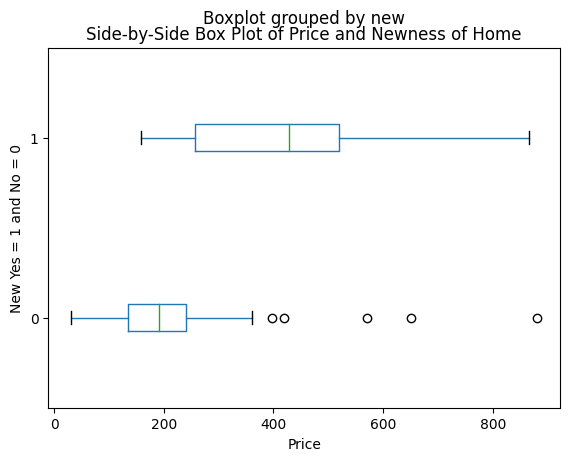

In [ ]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Price and Newness of Home')
plt.xlabel('Price')
plt.ylabel('New Yes = 1 and No = 0')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

As the size increases the price also increases. There is a positive linear relationship between the two. Similarly, If a house is new the price is greater on average than the price of an older home. This is shown in the boxplot comparison as all numbers in the 5-number comparison are greater for new homes than old homes.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [ ]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
happy.head(5)

,subject,happiness,marital,gender
0,1,1 1,male,NaN
1,2,1 1,male,NaN
2,3,1 1,male,NaN
3,4,1 1,male,NaN
4,5,1 1,male,NaN


In [ ]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
